#1.BFS

In [3]:
from collections import deque

def bfs(graph, start):
    visited = set()
    queue = deque([start])

    while queue:
        node = queue.popleft()
        if node not in visited:
            print(node, end=' ')
            visited.add(node)

            for neighbor in graph.get(node, []):
                if neighbor not in visited:
                    queue.append(neighbor)

# Define the graph
graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': ['F'],
    'F': []
}

# Run BFS
bfs(graph, 'A')


A B C D E F 

#2.VACCUM CLEANER

In [18]:
import random

class SimpleVacuumCleaner:
    def __init__(self, grid_size):  # Corrected __init__ method
        self.grid_size = grid_size
        self.grid = [[random.choice(['Clean', 'Dirty']) for _ in range(grid_size)] for _ in range(grid_size)]
        self.position = (0, 0)  
        self.cleaned_cells = 0

    def display_grid(self):
        for row in self.grid:
            print(' '.join(row))
        print()

    def clean(self):
        x, y = self.position
        if self.grid[x][y] == 'Dirty':
            self.grid[x][y] = 'Clean'
            self.cleaned_cells += 1
            print(f"Cleaned cell at position {self.position}.")

    def move(self):
        x, y = self.position
        if y < self.grid_size - 1:
            self.position = (x, y + 1)
        elif x < self.grid_size - 1:
            self.position = (x + 1, 0)
        print(f"Moved to position {self.position}.")

    def run(self, steps):
        for _ in range(steps):
            self.clean()
            self.move()
            self.display_grid()
        
        print(f"Total cleaned cells: {self.cleaned_cells}")


grid_size = 3  
vacuum_cleaner = SimpleVacuumCleaner(grid_size)
vacuum_cleaner.display_grid()
vacuum_cleaner.run(9)


Clean Clean Clean
Clean Dirty Dirty
Dirty Clean Dirty

Moved to position (0, 1).
Clean Clean Clean
Clean Dirty Dirty
Dirty Clean Dirty

Moved to position (0, 2).
Clean Clean Clean
Clean Dirty Dirty
Dirty Clean Dirty

Moved to position (1, 0).
Clean Clean Clean
Clean Dirty Dirty
Dirty Clean Dirty

Moved to position (1, 1).
Clean Clean Clean
Clean Dirty Dirty
Dirty Clean Dirty

Cleaned cell at position (1, 1).
Moved to position (1, 2).
Clean Clean Clean
Clean Clean Dirty
Dirty Clean Dirty

Cleaned cell at position (1, 2).
Moved to position (2, 0).
Clean Clean Clean
Clean Clean Clean
Dirty Clean Dirty

Cleaned cell at position (2, 0).
Moved to position (2, 1).
Clean Clean Clean
Clean Clean Clean
Clean Clean Dirty

Moved to position (2, 2).
Clean Clean Clean
Clean Clean Clean
Clean Clean Dirty

Cleaned cell at position (2, 2).
Moved to position (2, 2).
Clean Clean Clean
Clean Clean Clean
Clean Clean Clean

Total cleaned cells: 4


#3(a)

In [12]:
import heapq

def a_star(graph, start, goal, h):
    open_list = []
    heapq.heappush(open_list, (0, start)) 
    came_from = {}
    g_score = {start: 0}
    while open_list:
        current_f, current_node = heapq.heappop(open_list)

        if current_node == goal:
            return reconstruct_path(came_from, current_node)

       
        for neighbor, cost in graph.get(current_node, {}).items():
            tentative_g_score = g_score[current_node] + cost
            if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                g_score[neighbor] = tentative_g_score
                f_score = tentative_g_score + h.get(neighbor, float('inf'))
                heapq.heappush(open_list, (f_score, neighbor))
                came_from[neighbor] = current_node

    return None  

def reconstruct_path(came_from, current):
    path = [current]
    while current in came_from:
        current = came_from[current]
        path.append(current)
    return path[::-1]


graph = {
    'A': {'B': 1, 'C': 4},
    'B': {'D': 2, 'E': 5},
    'C': {'F': 3},
    'D': {},
    'E': {'F': 1},
    'F': {}
}

h = {'A': 7, 'B': 6, 'C': 4, 'D': 2, 'E': 1, 'F': 0}  
path = a_star(graph, 'A', 'F', h)
print("Path:", " -> ".join(path) if path else "No path found")


Path: A -> B -> E -> F


#3(b)

In [14]:
import heapq

def greedy_bfs(graph, start, goal, h):
    open_list = []
    heapq.heappush(open_list, (h[start], start))
    came_from = {}

    while open_list:
        _, current = heapq.heappop(open_list)

        if current == goal:
            reconstruct_path(came_from, current)
            return

        for neighbor in graph.get(current, {}):
            if neighbor not in came_from:
                came_from[neighbor] = current
                heapq.heappush(open_list, (h[neighbor], neighbor))

    print("Path not found")

def reconstruct_path(came_from, current):
    path = [current]
    while current in came_from:
        current = came_from[current]
        path.append(current)
    print(" -> ".join(reversed(path)))

graph = {
    'A': {'B': 1, 'C': 4},
    'B': {'D': 2, 'E': 5},
    'C': {'F': 3},
    'D': {},
    'E': {'F': 1},
    'F': {}
}

h = {'A': 7, 'B': 6, 'C': 4, 'D': 2, 'E': 1, 'F': 0}  # Heuristic values

# Run Greedy Best-First Search
greedy_bfs(graph, 'A', 'F', h)


A -> C -> F


#4 Implement local search optimization algorithms such as Simulated Annealing.

In [15]:
import math
import random

def simulated_annealing(function, bounds, temp, cooling_rate, max_iterations):
    current_solution = random.uniform(bounds[0], bounds[1])
    best_solution = current_solution

    for i in range(max_iterations):
        new_solution = current_solution + random.uniform(-1, 1) 
        new_solution = max(min(new_solution, bounds[1]), bounds[0]) 
        current_value = function(current_solution)
        new_value = function(new_solution)

        if new_value < current_value: 
            current_solution = new_solution
        else:
          
            acceptance_prob = math.exp((current_value - new_value) / temp)
            if acceptance_prob > random.random():
                current_solution = new_solution
        
        if function(current_solution) < function(best_solution):
            best_solution = current_solution
        
        temp *= cooling_rate  

    return best_solution


def function(x):
    return x ** 2


bounds = (-10, 10)  
temp = 100  
cooling_rate = 0.9 
max_iterations = 1000 

best_solution = simulated_annealing(function, bounds, temp, cooling_rate, max_iterations)
print(f"Best solution: {best_solution}, Function value: {function(best_solution)}")

Best solution: 0.0020430253039604995, Function value: 4.173952392622891e-06


#5

In [1]:
def initialize_board():
    return [[' ' for _ in range(3)] for _ in range(3)]

def print_board(board):
    for row in board:
        print('|'.join(row))
        print('-' * 5)

def utility(board):
    for player, val in [('X', 1), ('O', -1)]:
        for i in range(3):
            if all([board[i][j] == player for j in range(3)]):
                return val
            if all([board[j][i] == player for j in range(3)]):
                return val
        if all([board[i][i] == player for i in range(3)]):
            return val
        if all([board[i][2 - i] == player for i in range(3)]):
            return val
    return 0

def evaluation(board):
    X2, X1, O2, O1 = 0, 0, 0, 0

    def count_X_O(line):
        x_count = line.count('X')
        o_count = line.count('O')
        return x_count, o_count

    lines = [board[i] for i in range(3)] + [[board[j][i] for j in range(3)] for i in range(3)]
    lines.append([board[i][i] for i in range(3)])
    lines.append([board[i][2 - i] for i in range(3)])

    for line in lines:
        x_count, o_count = count_X_O(line)
        if x_count > 0 and o_count == 0:
            if x_count == 2:
                X2 += 1
            elif x_count == 1:
                X1 += 1
        elif o_count > 0 and x_count == 0:
            if o_count == 2:
                O2 += 1
            elif o_count == 1:
                O1 += 1

    return 3 * X2 + X1 - (3 * O2 + O1)

def is_full(board):
    return all(cell != ' ' for row in board for cell in row)

def make_move(board, player, row, col):
    if board[row][col] == ' ':
        board[row][col] = player
        return True
    return False

board = initialize_board()
print_board(board)
make_move(board, 'X', 0, 0)
make_move(board, 'X', 1, 1)
make_move(board, 'X', 2, 2)
make_move(board, 'O', 0, 1)
make_move(board, 'O', 1, 2)
print_board(board)
print(f"Utility: {utility(board)}")
print(f"Evaluation: {evaluation(board)}")


 | | 
-----
 | | 
-----
 | | 
-----
X|O| 
-----
 |X|O
-----
 | |X
-----
Utility: 1
Evaluation: 3


#6 Implement various activation functions and visualize the results.

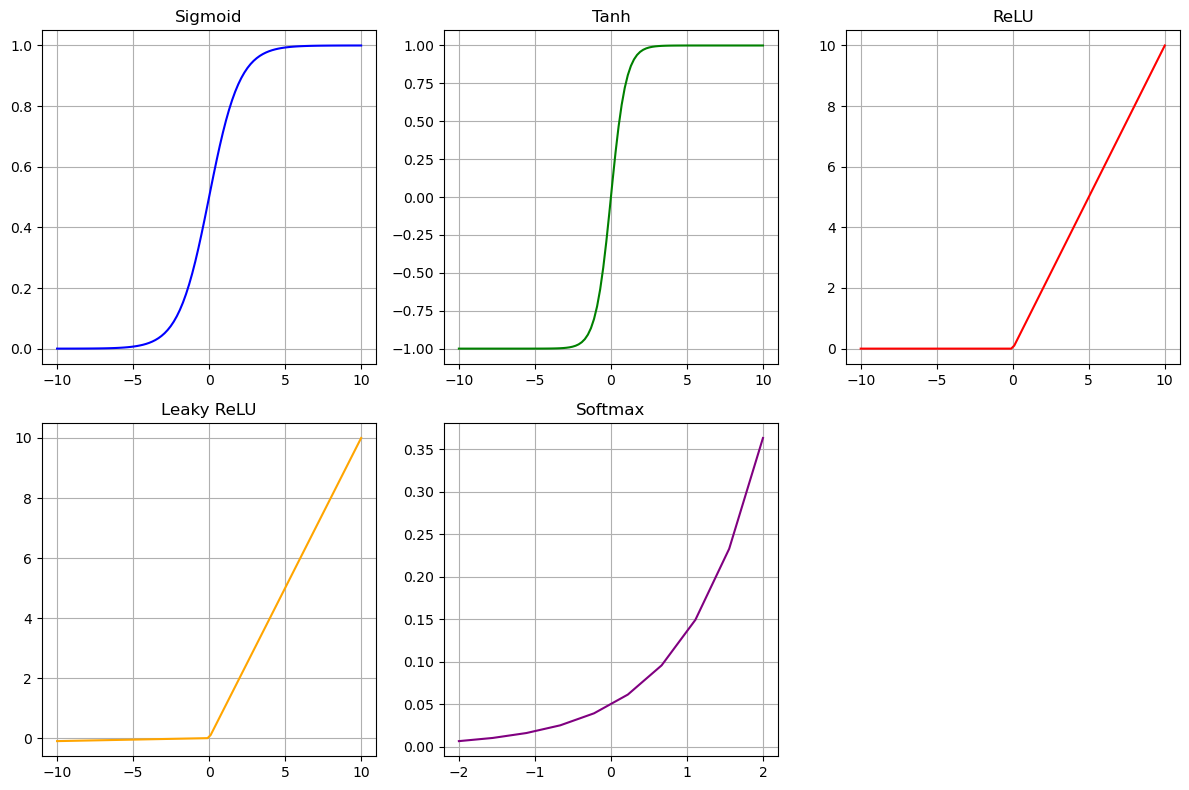

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def softmax(x):
    exp_x = np.exp(x - np.max(x))
    return exp_x / exp_x.sum(axis=0)

x = np.linspace(-10, 10, 100)

plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.plot(x, sigmoid(x), label='Sigmoid', color='blue')
plt.title('Sigmoid')
plt.grid(True)

plt.subplot(2, 3, 2)
plt.plot(x, tanh(x), label='Tanh', color='green')
plt.title('Tanh')
plt.grid(True)

plt.subplot(2, 3, 3)
plt.plot(x, relu(x), label='ReLU', color='red')
plt.title('ReLU')
plt.grid(True)

plt.subplot(2, 3, 4)
plt.plot(x, leaky_relu(x), label='Leaky ReLU', color='orange')
plt.title('Leaky ReLU')
plt.grid(True)

x_softmax = np.linspace(-2, 2, 10)
plt.subplot(2, 3, 5)
plt.plot(x_softmax, softmax(x_softmax), label='Softmax', color='purple')
plt.title('Softmax')
plt.grid(True)

plt.tight_layout()
plt.show()


#7	Implement basic neural network using binary sigmoidal, bipolar sigmoidal functions and display the results.

In [54]:
import numpy as np

def binary_sigmoid(x):
    return 1 / (1 + np.exp(-x))

def bipolar_sigmoid(x):
    return (2 / (1 + np.exp(-x))) - 1

def initialize_weights(input_size, hidden_size, output_size):
    np.random.seed(1)
    w_hidden = np.random.randn(input_size, hidden_size)
    w_output = np.random.randn(hidden_size, output_size)
    return w_hidden, w_output

def feedforward(x, w_hidden, w_output, activation_func):
    hidden_input = np.dot(x, w_hidden)
    hidden_output = activation_func(hidden_input)
    final_input = np.dot(hidden_output, w_output)
    final_output = activation_func(final_input)
    return final_output

input_data = np.array([[0.1, 0.2], [0.4, 0.5], [0.6, 0.9]])
input_size = input_data.shape[1]
hidden_size = 3
output_size = 1

w_hidden, w_output = initialize_weights(input_size, hidden_size, output_size)

binary_output = feedforward(input_data, w_hidden, w_output, binary_sigmoid)
bipolar_output = feedforward(input_data, w_hidden, w_output, bipolar_sigmoid)

print("Binary Sigmoidal Output:\n", binary_output)
print("Bipolar Sigmoidal Output:\n", bipolar_output)


Binary Sigmoidal Output:
 [[0.63812831]
 [0.63888648]
 [0.60950741]]
Bipolar Sigmoidal Output:
 [[-0.08387477]
 [-0.08061226]
 [-0.20321127]]


In [48]:
#8.Implement ANDNOT logic gate using McCulloch-Pitts neural model. This neural model will deal with the ANDNOT logic.

In [70]:
def activation(input_sum):
    return 1 if input_sum >= 0 else 0


def andnot_gate(X1, X2):

    w1 = 1   
    w2 = -1  
    bias = -0.5

    weighted_sum = X1 * w1 + X2 * w2 + bias
    output = activation(weighted_sum)
    
    return output


inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]

print("X1 X2 Y")
for X1, X2 in inputs:
    print(f"{X1}  {X2}  {andnot_gate(X1, X2)}")

X1 X2 Y
0  0  0
0  1  0
1  0  1
1  1  0


#9

In [41]:
import numpy as np

def max_min_composition(P, Q):
    R = np.zeros((P.shape[0], Q.shape[1]))
    for i in range(P.shape[0]):
        for j in range(Q.shape[1]):
            R[i, j] = np.max(np.minimum(P[i, :], Q[:, j]))
    return R

def max_dot_composition(P, Q):
    R = np.zeros((P.shape[0], Q.shape[1]))
    for i in range(P.shape[0]):
        for j in range(Q.shape[1]):
            R[i, j] = np.max(P[i, :] * Q[:, j])
    return R

P = np.array([[0.8, 0.6, 0.6, 0.9],
              [0.1, 0.2, 0.9, 0.8],
              [0.3, 0.9, 0.4, 0.8],
              [0.9, 0.8, 0.1, 0.2]])

Q = np.array([[0.1, 0.2, 0.7, 0.9],
              [1.0, 1.0, 0.4, 0.6],
              [0.0, 0.5, 0.0, 0.9],
              [0.9, 1.0, 0.8, 0.2]])

R_max_min = max_min_composition(P, Q)
R_max_dot = max_dot_composition(P, Q)

print("Max-Min Composition:\n", R_max_min)
print("Max-Dot Composition:\n", R_max_dot)


Max-Min Composition:
 [[0.9 0.9 0.8 0.8]
 [0.8 0.8 0.8 0.9]
 [0.9 0.9 0.8 0.6]
 [0.8 0.8 0.7 0.9]]
Max-Dot Composition:
 [[0.81 0.9  0.72 0.72]
 [0.72 0.8  0.64 0.81]
 [0.9  0.9  0.64 0.54]
 [0.8  0.8  0.63 0.81]]


#10

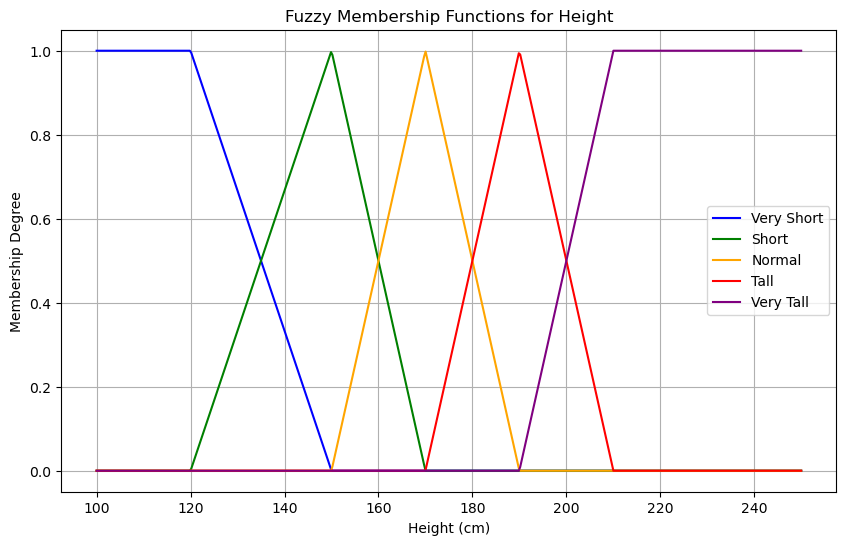

In [34]:
import numpy as np
import matplotlib.pyplot as plt


def very_short(x):
    return np.maximum(0, np.minimum(1, (150 - x) / (150 - 120)))

def short(x):
    return np.maximum(0, np.minimum((x - 120) / (150 - 120), (170 - x) / (170 - 150)))

def normal(x):
    return np.maximum(0, np.minimum((x - 150) / (170 - 150), (190 - x) / (190 - 170)))

def tall(x):
    return np.maximum(0, np.minimum((x - 170) / (190 - 170), (210 - x) / (210 - 190)))

def very_tall(x):
    return np.maximum(0, np.minimum(1, (x - 190) / (210 - 190)))


x_values = np.linspace(100, 250, 500)


very_short_values = very_short(x_values)
short_values = short(x_values)
normal_values = normal(x_values)
tall_values = tall(x_values)
very_tall_values = very_tall(x_values)


plt.figure(figsize=(10, 6))
plt.plot(x_values, very_short_values, label='Very Short', color='blue')
plt.plot(x_values, short_values, label='Short', color='green')
plt.plot(x_values, normal_values, label='Normal', color='orange')
plt.plot(x_values, tall_values, label='Tall', color='red')
plt.plot(x_values, very_tall_values, label='Very Tall', color='purple')

plt.title('Fuzzy Membership Functions for Height')
plt.xlabel('Height (cm)')
plt.ylabel('Membership Degree')
plt.legend()
plt.grid(True)
plt.show()

#guassian method

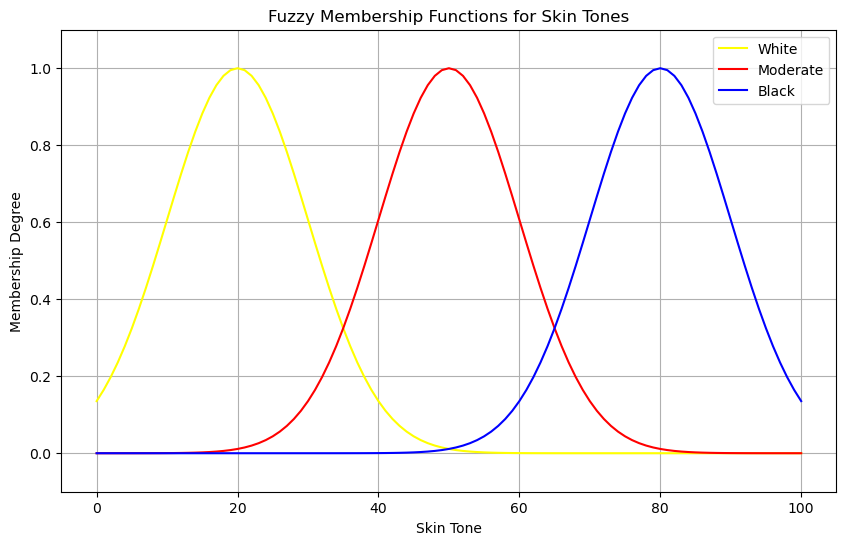

In [96]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt


x = np.arange(0, 101, 1)


white = fuzz.gaussmf(x, 20, 10)  
moderate = fuzz.gaussmf(x, 50, 10) 
black = fuzz.gaussmf(x, 80, 10) 


plt.figure(figsize=(10, 6))
plt.plot(x, white, label='White', color='yellow')
plt.plot(x, moderate, label='Moderate', color='red')
plt.plot(x, black, label='Black', color='blue')


plt.title('Fuzzy Membership Functions for Skin Tones')
plt.xlabel('Skin Tone')
plt.ylabel('Membership Degree')
plt.legend()
plt.grid(True)
plt.ylim(-0.1, 1.1)  
plt.show()